# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Loading

In [5]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
df.head() #to display first 5 rows of dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.tail() #to display last 5 rows of dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


# Data Preprocessing

In [8]:
df.shape #to display the rows and columns of dataset

(100000, 9)

In [9]:
df.isnull().sum() #to count the number of missing (NaN or null) values in each column of a Dataset.

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
df.info() #to provide a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [11]:
df = df.astype({'age': int}) #to change the 'age' column from object type to integer data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int32  
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 6.5+ MB


In [12]:
#encoding categorical variables with nominal values into numerical values.
map_name={'Male':1,'Female':2,'Other':3} 
df['gender']=df['gender'].map(map_name)
print(df)

       gender  age  hypertension  heart_disease smoking_history    bmi  \
0           2   80             0              1           never  25.19   
1           2   54             0              0         No Info  27.32   
2           1   28             0              0           never  27.32   
3           2   36             0              0         current  23.45   
4           1   76             1              1         current  20.14   
...       ...  ...           ...            ...             ...    ...   
99995       2   80             0              0         No Info  27.32   
99996       2    2             0              0         No Info  17.37   
99997       1   66             0              0          former  27.83   
99998       2   24             0              0           never  35.42   
99999       2   57             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1      

In [13]:
# to encode the "smoking_history" column in a DataFrame (df) into numerical values as:
# No Info=0, current=1, ever=2, former=3, never=4, not current=5

from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
labels = encoder.fit_transform(df.smoking_history)
df['encoder_smoking_history'] = labels
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,encoder_smoking_history
0,2,80,0,1,never,25.19,6.6,140,0,4
1,2,54,0,0,No Info,27.32,6.6,80,0,0
2,1,28,0,0,never,27.32,5.7,158,0,4
3,2,36,0,0,current,23.45,5.0,155,0,1
4,1,76,1,1,current,20.14,4.8,155,0,1
...,...,...,...,...,...,...,...,...,...,...
99995,2,80,0,0,No Info,27.32,6.2,90,0,0
99996,2,2,0,0,No Info,17.37,6.5,100,0,0
99997,1,66,0,0,former,27.83,5.7,155,0,3
99998,2,24,0,0,never,35.42,4.0,100,0,4


In [14]:
df2 = df.drop(['smoking_history'], axis=1) #removing the original 'smoking_history'
print(df2)

       gender  age  hypertension  heart_disease    bmi  HbA1c_level  \
0           2   80             0              1  25.19          6.6   
1           2   54             0              0  27.32          6.6   
2           1   28             0              0  27.32          5.7   
3           2   36             0              0  23.45          5.0   
4           1   76             1              1  20.14          4.8   
...       ...  ...           ...            ...    ...          ...   
99995       2   80             0              0  27.32          6.2   
99996       2    2             0              0  17.37          6.5   
99997       1   66             0              0  27.83          5.7   
99998       2   24             0              0  35.42          4.0   
99999       2   57             0              0  22.43          6.6   

       blood_glucose_level  diabetes  encoder_smoking_history  
0                      140         0                        4  
1                  

In [15]:
df2['diabetes'].value_counts()   # to count the number of occurrences of each unique value in the 'diabetes' column

diabetes
0    91500
1     8500
Name: count, dtype: int64

# Under-sampling

In [16]:
# to separate your dataset into two subsets: one for negative class (where diabetes is 0) and one for positive class (where diabetes is 1)
negative = df2[df2.diabetes == 0]
positive = df2[df2.diabetes == 1]
print(negative.shape)
print(positive.shape)

(91500, 9)
(8500, 9)


In [17]:
# randomly selects 8,500 samples from the negative DataFrame to balance the class distribution
negative_sample = negative.sample(n=8500)
negative_sample.shape

(8500, 9)

In [18]:
df3 = pd.concat([negative_sample, positive], axis = 0)  #to combine two DataFrames
df3

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,encoder_smoking_history
35485,2,49,0,0,24.98,6.2,140,0,0
96493,2,4,0,0,23.91,4.8,80,0,0
31921,1,80,0,0,27.32,4.8,126,0,0
77673,2,26,0,0,22.68,6.5,126,0,0
24090,2,35,0,0,27.32,4.8,126,0,4
...,...,...,...,...,...,...,...,...,...
99935,2,65,1,1,33.55,8.2,140,1,4
99938,1,55,0,1,30.42,6.2,300,1,3
99957,2,61,0,0,34.45,6.5,280,1,0
99962,2,58,1,0,38.31,7.0,200,1,4


In [19]:
df3['diabetes'].value_counts() # to count the number of occurrences of each unique value in the 'diabetes' column

diabetes
0    8500
1    8500
Name: count, dtype: int64

# Understanding Dataset

In [20]:
df3.describe() # to generate various summary statistics of the numerical columns in a DataFrame.

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,encoder_smoking_history
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,1.552471,50.559294,0.152765,0.090176,29.454976,6.168859,163.530353,0.500000,2.451412
std,0.497254,21.446080,0.359771,0.286443,7.359322,1.281370,56.844316,0.500015,1.806901
min,1.000000,0.000000,0.000000,0.000000,10.300000,3.500000,80.000000,0.000000,0.000000
25%,1.000000,36.000000,0.000000,0.000000,25.970000,5.700000,130.000000,0.000000,0.000000
50%,2.000000,54.000000,0.000000,0.000000,27.320000,6.100000,155.000000,0.500000,3.000000
75%,2.000000,67.000000,0.000000,0.000000,32.802500,6.600000,200.000000,1.000000,4.000000
max,2.000000,80.000000,1.000000,1.000000,95.220000,9.000000,300.000000,1.000000,5.000000


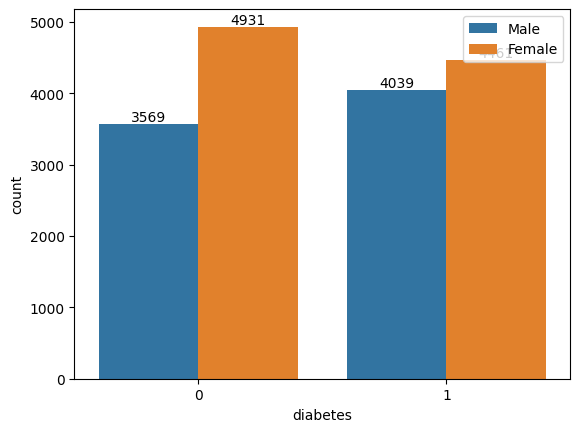

In [21]:
# to create a countplot with Seaborn and label the bars with counts 
gen=sns.countplot(x='diabetes',data=df3,hue='gender')

for bars in gen.containers:
    gen.bar_label(bars,label_type='edge')
    
plt.legend(["Male", "Female" , "Others"],  loc ="upper right")

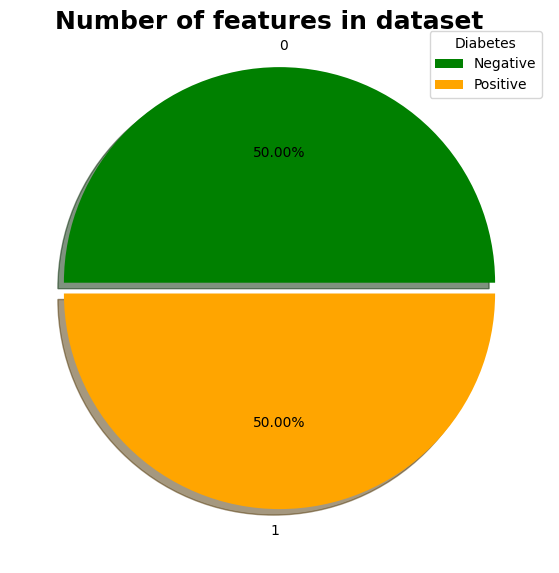

In [22]:
# to create a pie chart to visualize the distribution of diabetes labels (0 for negative and 1 for positive)using Matplotlib.
labels = [0, 1]
size = df3['diabetes'].value_counts()
colors = [ 'green', 'orange']
explode = [0.05, 0]
plt.figure(figsize=(8,7))
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.suptitle("Number of features in dataset", y=0.9, size=18,weight="bold")
plt.legend(["Negative", "Positive"],  title="Diabetes")
plt.show()

# Exploratory Data Analysis (EDA) to check the correlation between features.

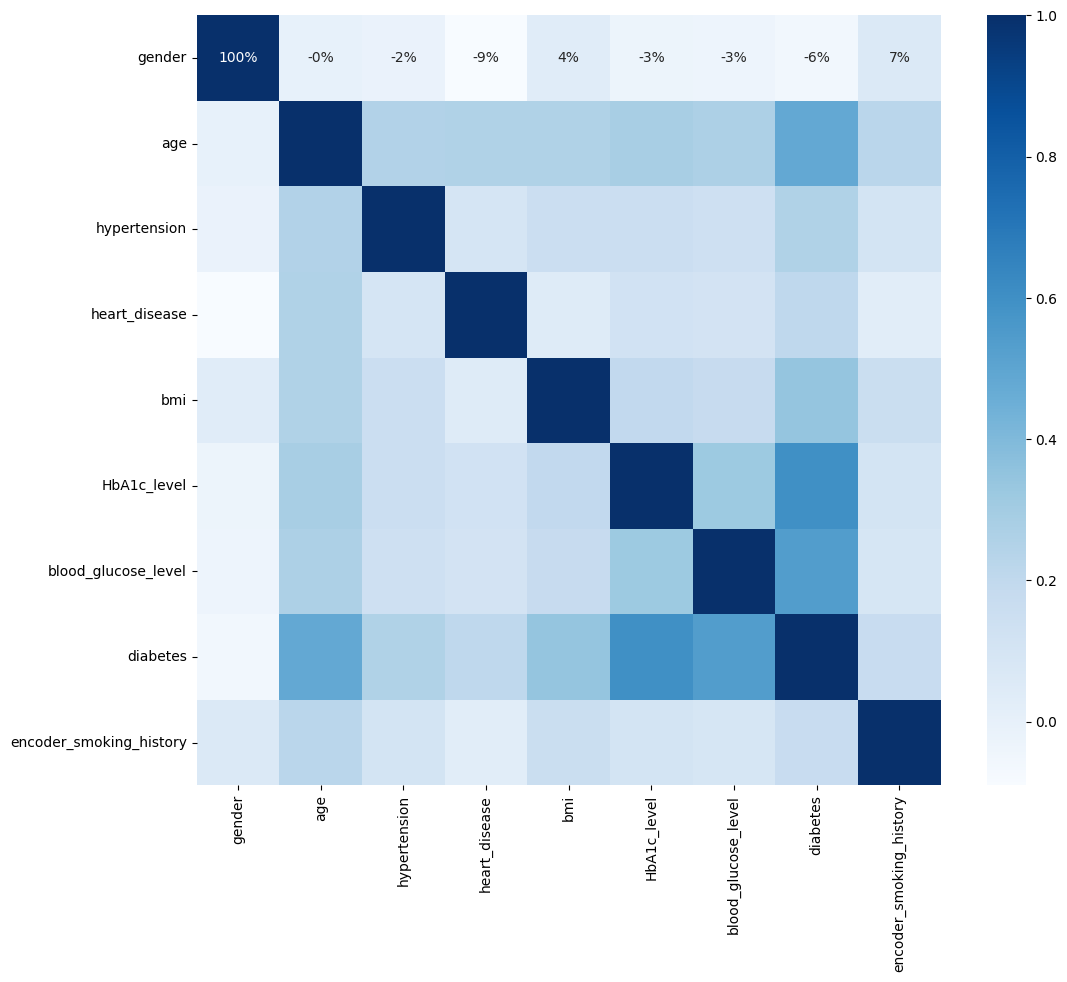

In [23]:
# creating a heatmap of the correlation matrix using Seaborn and Matplotlib.
axis = plt.figure(figsize=(12,10))
sns.heatmap(df3.corr() , annot= True , cmap = "Blues" , fmt=".0%")
plt.show()

# Feature Scaling

In [24]:
# separate feature matrix X and target variable Y from DataFrame
X= df3.drop("diabetes" , axis=1)
Y= df3["diabetes"]

In [25]:
# splitting dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train , X_test ,Y_train, Y_test=train_test_split(X,Y,test_size=0.10 , random_state=0)

In [26]:
# StandardScaler standardize feature ensuring they have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Classification

In [27]:
from sklearn.metrics import confusion_matrix ,classification_report, accuracy_score

In [28]:
# evaluating different ML models and store their accuracy scores and names in a list

acc=[]
model_name=['Logistic Regression','Decision Tree','Perceptron','Random Forest','K Nearest Neighbor', 'Naive Bayes', 'Voting Classifier']

# Logistic Regression

In [29]:
# creating LogisticRegression model having specific parameters :
# multinomial: handle multiple class prediction problems
# saga: Stochastic Average Gradient Descent,iteratively update model weights during training.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

In [30]:
# to make predictions on the test dataset
y_pred=model.predict(X_test)

In [31]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_lr=accuracy_score(Y_test,y_pred)
acc.append(acc_lr)
acc_lr

0.8905882352941177

In [32]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[760  81]
 [105 754]]


In [33]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       841
           1       0.90      0.88      0.89       859

    accuracy                           0.89      1700
   macro avg       0.89      0.89      0.89      1700
weighted avg       0.89      0.89      0.89      1700



# Decision Tree Classifier

In [34]:
# creating DecisionTreeClassifier having parameter: 'gini' measures impurity by Gini index, splite nodes to minimize class impurity 

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='gini',max_depth=1000)
clf.fit(X_train, Y_train.values.ravel())

DecisionTreeClassifier(max_depth=1000)

In [35]:
# to make predictions on the test dataset
y_pred=clf.predict(X_test)

In [36]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[761  80]
 [123 736]]


In [37]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_decisionT=accuracy_score(Y_test,y_pred)
acc.append(acc_decisionT)
acc_decisionT

0.8805882352941177

In [38]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       841
           1       0.90      0.86      0.88       859

    accuracy                           0.88      1700
   macro avg       0.88      0.88      0.88      1700
weighted avg       0.88      0.88      0.88      1700



# Perceptron

In [39]:
#  creating Perceptron Model
from sklearn.linear_model import Perceptron
clf3=Perceptron()
clf3.fit(X_train, Y_train.values.ravel())

Perceptron()

In [40]:
# to make predictions on the test dataset
y_pred=clf3.predict(X_test)

In [41]:
#  to compute the confusion matrix 
confusion_matrix(Y_test,y_pred)

array([[678, 163],
       [150, 709]], dtype=int64)

In [42]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_per=accuracy_score(Y_test,y_pred)
acc.append(acc_per)
acc_per

0.8158823529411765

In [43]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       841
           1       0.81      0.83      0.82       859

    accuracy                           0.82      1700
   macro avg       0.82      0.82      0.82      1700
weighted avg       0.82      0.82      0.82      1700



# Random Forest Classifier

In [44]:
# creating random forest classifier model consist of 20 decision trees(n_estimators) and measure of impurity in dataset(gini). 

from sklearn.ensemble import RandomForestClassifier
cl_random=RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=1000)
cl_random.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(max_depth=1000, n_estimators=20)

In [45]:
# to make predictions on the test dataset
y_pred=cl_random.predict(X_test)

In [46]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[778  63]
 [ 99 760]]


In [47]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_rfc=accuracy_score(Y_test,y_pred)
acc.append(acc_rfc)
acc_rfc

0.9047058823529411

In [48]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       841
           1       0.92      0.88      0.90       859

    accuracy                           0.90      1700
   macro avg       0.91      0.90      0.90      1700
weighted avg       0.91      0.90      0.90      1700



# K Nearest Neighbors

In [49]:
# creating a k nearsest neighbors model such that the number of neighbors to consider when making predictions is k = 5.

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train.values.ravel())

KNeighborsClassifier()

In [50]:
# to make the predictions
y_pred=knn.predict(X_test)

In [51]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[750  91]
 [ 95 764]]


In [52]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_knn=accuracy_score(Y_test,y_pred)
acc.append(acc_knn)
acc_knn

0.8905882352941177

In [53]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       841
           1       0.89      0.89      0.89       859

    accuracy                           0.89      1700
   macro avg       0.89      0.89      0.89      1700
weighted avg       0.89      0.89      0.89      1700



# Naive Bayes Classifier

In [54]:
# creating a Gaussian Naive Bayes Classifier model

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train.values.ravel())

GaussianNB()

In [55]:
# to make the predictions
y_pred=nb.predict(X_test)

In [56]:
print(confusion_matrix(Y_test,y_pred))

[[767  74]
 [198 661]]


In [57]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_nb=accuracy_score(Y_test,y_pred)
acc.append(acc_nb)
acc_nb

0.84

In [58]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       841
           1       0.90      0.77      0.83       859

    accuracy                           0.84      1700
   macro avg       0.85      0.84      0.84      1700
weighted avg       0.85      0.84      0.84      1700



# Enemble Learning: Voting Classifier

In [59]:
# create an ensemble model that combines the predictions of several individual classifiers(Random Forest, Decision Tree, Naive Bayes, K Nearest Neighbors, Perceptron, Logistic Regression)
# such that the class label with the most votes will be the final prediction (voting='hard')

from sklearn.ensemble import VotingClassifier
classifier=VotingClassifier(estimators=[('Random Forest',cl_random),('Decision Tree',clf),('Naive Bayes Classifier',nb),('K Nearest Neighbors',knn),('Perceptron',clf3),("Logistic Regression",model )], voting='hard',weights=[1,1,1,1,1,1])
classifier.fit(X_train,Y_train.values.ravel())

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(max_depth=1000,
                                                     n_estimators=20)),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=1000)),
                             ('Naive Bayes Classifier', GaussianNB()),
                             ('K Nearest Neighbors', KNeighborsClassifier()),
                             ('Perceptron', Perceptron()),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000,
                                                 multi_class='multinomial',
                                                 solver='saga'))],
                 weights=[1, 1, 1, 1, 1, 1])

In [60]:
# to make the predictions
y_pred=classifier.predict(X_test)

In [61]:
#  to compute the confusion matrix 
print(confusion_matrix(Y_test,y_pred))

[[787  54]
 [122 737]]


In [62]:
# calculating accuracy of model's predictions and then appending the accuracy score to a list
acc_vc=accuracy_score(Y_test,y_pred)
acc.append(acc_vc)
acc_vc

0.8964705882352941

In [63]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       841
           1       0.93      0.86      0.89       859

    accuracy                           0.90      1700
   macro avg       0.90      0.90      0.90      1700
weighted avg       0.90      0.90      0.90      1700



# Comparison Of Classification Models Based On Their Accuracy Scores

In [64]:
print(acc)

[0.8905882352941177, 0.8805882352941177, 0.8158823529411765, 0.9047058823529411, 0.8905882352941177, 0.84, 0.8964705882352941]


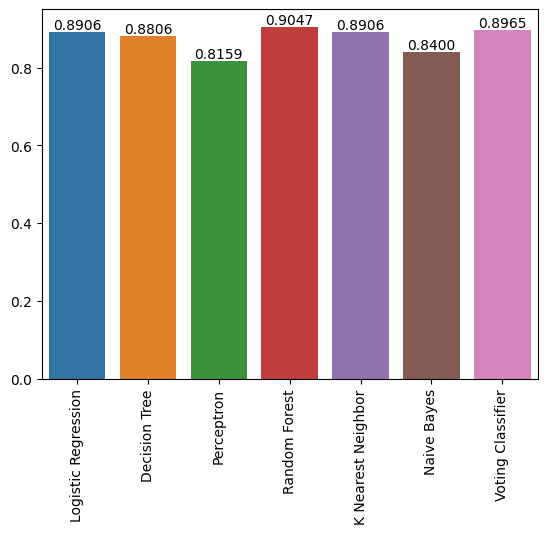

In [65]:
# to create a bar plot to visualize the accuracy scores of different machine learning models
ax = sns.barplot(x=model_name, y=acc)
for i, height in enumerate(acc):
    ax.text(i, height, f'{acc[i]:.4f}',ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

# Making a prediction from the model

In [66]:
# input_data=(gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smokinghistory(never))
# 2  4
input_data1=("Female"	,66	,1	,0	,27.19,	4.8	,85,"never")
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data1)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

df = pd.DataFrame(input_data_reshaped)

map_name={'Male':1,'Female':2,'Other':3} 
df[0]=df[0].map(map_name)

df[7]= encoder.fit_transform(df[7])

X= scaler.transform(df)

prediction = classifier.predict(X)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[['Female' '66' '1' '0' '27.19' '4.8' '85' 'never']]
[0]
The person is not diabetic


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
# input_data=(gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smokinghistory(former))

input_data2=("Male",	55,	0	,1	,30.42,	6.2,	300,		"former")
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data2)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)
df = pd.DataFrame(input_data_reshaped)

map_name={'Male':1,'Female':2,'Other':3} 
df[0]=df[0].map(map_name)

df[7]= encoder.fit_transform(df[7])

X= scaler.transform(df)

prediction =classifier.predict(X)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[['Male' '55' '0' '1' '30.42' '6.2' '300' 'former']]
[1]
The person is diabetic


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Saving the Trained Model

In [68]:
import pickle

In [69]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [70]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [71]:
# input_data=(gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smokinghistory(former))

input_data2=("Male",	55,	0	,1	,30.42,	6.2,	300,		"former")
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data2)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)
df = pd.DataFrame(input_data_reshaped)

map_name={'Male':1,'Female':2,'Other':3} 
df[0]=df[0].map(map_name)

df[7]= encoder.fit_transform(df[7])

X= scaler.transform(df)

prediction =loaded_model.predict(X)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[['Male' '55' '0' '1' '30.42' '6.2' '300' 'former']]
[1]
The person is diabetic


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [72]:
# input_data=(gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smokinghistory(never))
# 2  4
input_data1=("Female"	,66	,1	,0	,27.19,	4.8	,85,"never")
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data1)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

df = pd.DataFrame(input_data_reshaped)

map_name={'Male':1,'Female':2,'Other':3} 
df[0]=df[0].map(map_name)

df[7]= encoder.fit_transform(df[7])

X= scaler.transform(df)

prediction = loaded_model.predict(X)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[['Female' '66' '1' '0' '27.19' '4.8' '85' 'never']]
[0]
The person is not diabetic


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
